<a href="https://colab.research.google.com/github/Blf100/Segmenta-o-de-Clientes/blob/main/Segmenta%C3%A7%C3%A3o_de_Clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Olist e-commerce: segmentação de clientes

O objetivo do projeto é identificar quais grupos de clientes são mais ativos na plataforma. Para executar essa análise, iremos realizar uma segmentação por meio de análise de clusters, utilizando o algorítimo de machine learrning k-means. No final do projeto, será possível planejar e executar estratégias com base nas carecterísticas inerentes a cada grupo de clientes.

### Importando as Bibliotecas

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
plt.style.use('ggplot')
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', None)

### Carregando os Dados








In [4]:
df_olist_orders = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projetos/Olist E-commerce/Dados/olist_orders_dataset.csv')
df_olist_items = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projetos/Olist E-commerce/Dados/olist_order_items_dataset.csv')
df_olist_customers = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projetos/Olist E-commerce/Dados/olist_customers_dataset.csv')

### Análise Exploratória de Dados


*   Investigar valores nulos
*   Verificar o tipo dos dados
*   Encontra possíveis valores duplicados
*   Analisar a distribuição da variáveis



#### Análise exploratória olist_oders

##### **df_olist_orders**: contêm informações sobre os pedidos dos clientes. 
* order_id: identificador único do pedido
* customers_id: identificador único do cliente
* order_status: situação do pedido
* order_purchase_timestamp: data e hora da realização do pedido
* order_approved_at: data e hora da aprovação da compra
* order_delivered_carrier_date: data e hora do lançamento do pedido
* order_delivered_customer_date: data e hora da entrega do pedido
* order_estimated_delivery_date: data e hora da entrega informado no momento da do pedido

Vizualizando as cinco primeiras linhas do dataset

In [5]:
df_olist_orders.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Tamanho do dataset

In [6]:
# Tamanho do dataset original
print('O dataset possui {} linhas'.format(df_olist_orders.shape[0]))
print('O dataset possui {} colunas'.format(df_olist_orders.shape[1]))

O dataset possui 99441 linhas
O dataset possui 8 colunas


Informações gerais sobre o dataset

In [7]:
# Informações gerais sobre o dataset
df_olist_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Buscando valores nulos

* As três variáveis que possuem valores faltantes estão relacionadas com data e hora de processos relacionados aos pedidos: order_delivered_customer_date, order_delivered_carrier_date e order_approved_at.

* Uma hipótese para valores ausentes em order_approved_at é que os pedidos não foram concluídos por falta de pagamento.

* Uma para hipótese valores ausentes em order_delivered_carrier_date e order_delivered_customer_date é que a transportadora pode não ter registrado essas informações ou os dados foram capturados antes que os dados fossem consolidados na base.



In [8]:
# Buscando dados nulos no dataset
df_olist_orders.isnull().sum().sort_values(ascending= False)

order_delivered_customer_date    2965
order_delivered_carrier_date     1783
order_approved_at                 160
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_estimated_delivery_date       0
dtype: int64

Vizualizando status dos pedidos que encontram-se com valores nulos na coluna order_approved_at

* Como é possível observar no filtro, a maior parte dos status do pedido relacionado com a coluna order_approved_at é canceled, ou seja, o pedido pode foi cancelado pelo vendedor ou cliente. Geralmente, isso pode acontece por conta de problemas na efetuação do pagamento. Os outros status são entregue e created, apontando possíveis erro humano ou do sistema.

In [9]:
df_olist_orders[df_olist_orders['order_approved_at'].isnull()]['order_status'].value_counts()

canceled     141
delivered     14
created        5
Name: order_status, dtype: int64

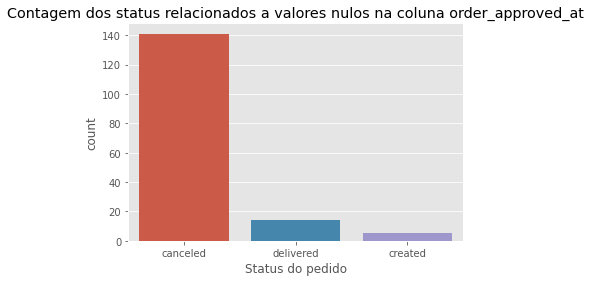

In [10]:
sns.countplot(df_olist_orders[df_olist_orders['order_approved_at'].isnull()]['order_status'])
plt.title('Contagem dos status relacionados a valores nulos na coluna order_approved_at')
plt.xlabel('Status do pedido')
plt.show()

Vizualizando status dos pedidos que encontram-se com valores nulos na coluna order_delivered_carrier_date.

* Os pedidos que contêm valores nulos na coluna order_delivered_carrier_date em sua maior parte estão com status de indisponível ou cancedado, apontando um possível cancelamento por parte do cliente/vendedor ou falta de envio de informações da transportadora ao vendedor. Além disso, status como processing e invoiced são anteriores ao lançamento do pedido, justificando a falta de data e hora na coluna order_delivered_carrier_date.

In [11]:
df_olist_orders[df_olist_orders['order_delivered_carrier_date'].isnull()]['order_status'].value_counts()

unavailable    609
canceled       550
invoiced       314
processing     301
created          5
approved         2
delivered        2
Name: order_status, dtype: int64

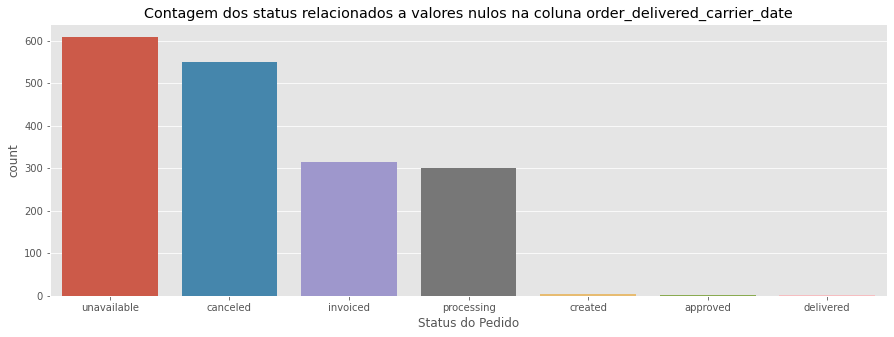

In [12]:
plt.figure(figsize=(15,5))
sns.countplot(df_olist_orders[df_olist_orders['order_delivered_carrier_date'].isnull()]['order_status'], order= df_olist_orders[df_olist_orders['order_delivered_carrier_date'].isnull()]['order_status'].value_counts().index)
plt.title('Contagem dos status relacionados a valores nulos na coluna order_delivered_carrier_date')
plt.xlabel('Status do Pedido')
plt.show()

Vizualizando status dos pedidos que encontram-se com valores nulos na coluna order_delivered_customer_date.

* A maioria dos pedidos que contêm valores nulos na coluna order_delivered_customer_date estão com status que remetem estágios anteriores a entrega do pedido ao cliente, justificando a falta da data e hora da entrega do pedido, ja que esses ainda tiveram a entrega consumada. 

In [13]:
df_olist_orders[df_olist_orders['order_delivered_customer_date'].isnull()]['order_status'].value_counts()

shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered         8
created           5
approved          2
Name: order_status, dtype: int64

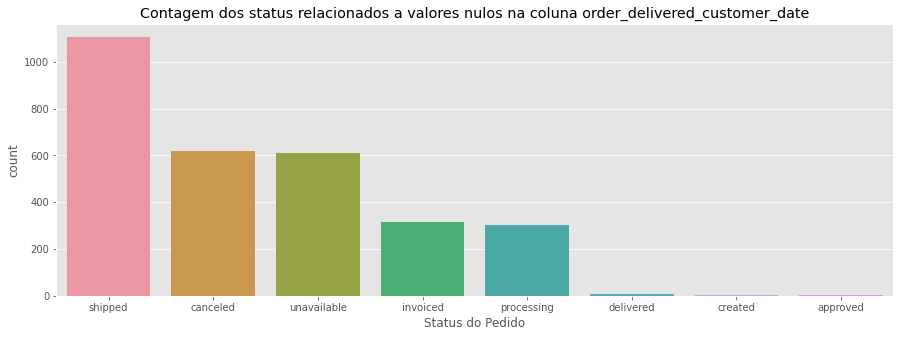

In [14]:
plt.figure(figsize=(15,5))
sns.countplot(df_olist_orders[df_olist_orders['order_delivered_customer_date'].isnull()]['order_status'], order=df_olist_orders[df_olist_orders['order_delivered_customer_date'].isnull()]['order_status'].value_counts().index )
plt.title('Contagem dos status relacionados a valores nulos na coluna order_delivered_customer_date')
plt.xlabel('Status do Pedido')
plt.show()

Buscando valores duplicados

* A base não possui valores duplicados

In [15]:
df_olist_orders.duplicated().value_counts()

False    99441
dtype: int64

Contagem do atributo order_status

In [16]:
df_olist_orders['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

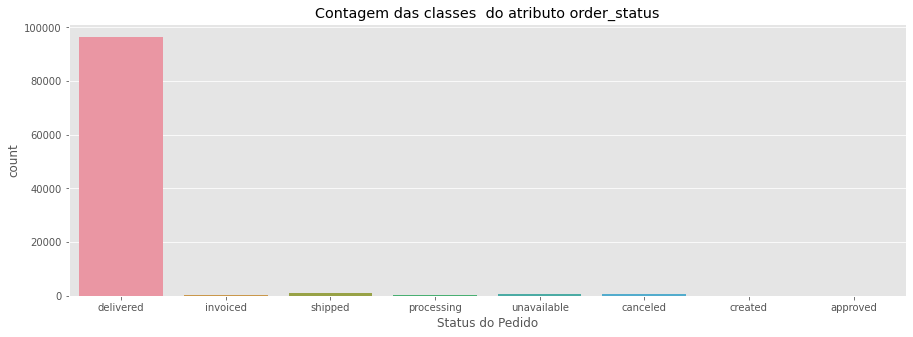

In [17]:
plt.figure(figsize=(15,5))
sns.countplot(df_olist_orders['order_status'])
plt.title('Contagem das classes  do atributo order_status')
plt.xlabel('Status do Pedido')
plt.show()

#### Análise Exploratória df_olist_customers



##### **df_olist_customers**: contêm informações sobre os clientes

* customer_id: chave para conectar com o dataset      df_olist_orders
* customer_unique_id: identificador único do cliente
* customer_zip_code_prefix: primeiros cinco dígitos do CEP do cliente
* customer_city: cidade do cliente
* customer_state: estado do cliente

Primeiras informações sobre o dataset

In [18]:
df_olist_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Buscando valores nulos

* A base não possui valores nulos

In [19]:
df_olist_customers.isnull().sum().sort_values(ascending=True)

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Buscando valores duplicados 

* A base não possui valores duplicados

In [20]:
df_olist_customers.duplicated().value_counts()

False    99441
dtype: int64

Vizualizando a distribuição geografica dos clientes

* Os estados com maior número de clietes são: SP, RJ e MG.

In [21]:
df_olist_customers['customer_state'].value_counts()

SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_state, dtype: int64

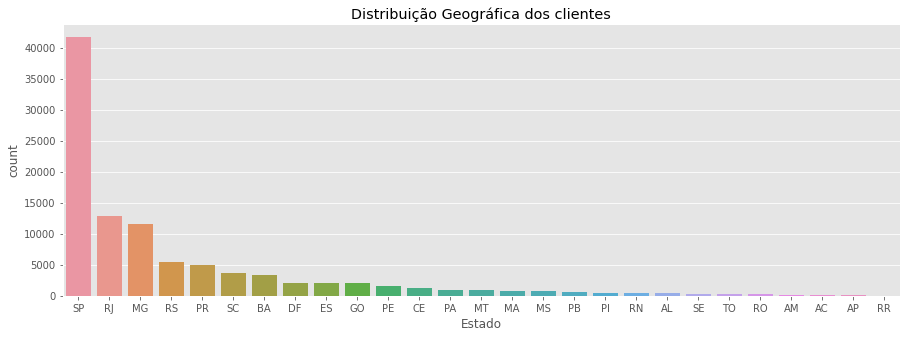

In [22]:
plt.figure(figsize=(15,5))
sns.countplot(df_olist_customers['customer_state'], order=df_olist_customers['customer_state'].value_counts().index)
plt.title('Distribuição Geográfica dos clientes')
plt.xlabel('Estado')
plt.show()

Verificando quantos clientes fizeram mais de um pedido

In [23]:
# Número de clientes que fizeram um único pedido
df_olist_customers['customer_unique_id'].unique().shape[0]

96096

In [24]:
# Número total de clientes que fizeram pedidos
df_olist_customers['customer_unique_id'].shape[0]

99441

In [25]:
# Clientes que executaram mais de um pedido
print('A quantidade de clientes que executaram mais de um pedido é: {}'.format(df_olist_customers['customer_unique_id'].shape[0] - df_olist_customers['customer_unique_id'].unique().shape[0]))

A quantidade de clientes que executaram mais de um pedido é: 3345


#### Análise Exploratória df_olist_items

**df_olist_items**: contêm informações sobre os itens

* order_id: idenficador único do pedido
* order_item_id: número de itens incluídos no mesmo pedido
* product_id: identificador único do produto
* seller_id: identificador único do vendedor
* shipping_limit_date: data limite para o envio do pedido ao  parceiro logístico
* price: preço do item
* freight_value: valor do frete para o item. Caso haja mais de um item, o valor sera dividído pelo número de itens

Primeiras linhas do dataset

In [26]:
df_olist_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Tamanho do dataset

In [27]:
df_olist_items.shape

(112650, 7)

Informações gerais sobre o dataset

In [28]:
df_olist_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Buscando valores nulos

* O dataset não possui valores nulos

In [29]:
df_olist_items.isnull().sum().sort_values(ascending=False)

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Buscando linhas duplicadas

* O dataset não possui linhas duplicadas

In [30]:
df_olist_items.duplicated().value_counts()

False    112650
dtype: int64

Frequência do número de itens por pedido

* A grande maioria dos pedidos são de 1 ou 2 itens

In [31]:
df_olist_items['order_item_id'].value_counts()

1     98666
2      9803
3      2287
4       965
5       460
6       256
7        58
8        36
9        28
10       25
11       17
12       13
13        8
14        7
15        5
16        3
17        3
18        3
19        3
20        3
21        1
Name: order_item_id, dtype: int64

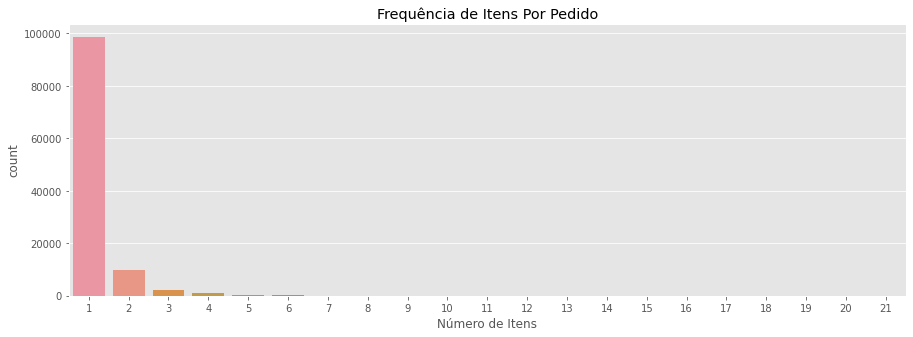

In [32]:
plt.figure(figsize=(15,5))
sns.countplot(df_olist_items['order_item_id'])
plt.title('Frequência de Itens Por Pedido')
plt.xlabel('Número de Itens')
plt.show()

Estatísticas descritivas do do atributo price

* O menor valor para um item foi de 85 centavos, enquanto o maior foi de 6.735 reais.

* No entanto, a maior parte do preços está concentrada na faixa entre 39,90 e 134,90 reais. 

* O price possui vários outliers.

In [33]:
df_olist_items['price'].describe()  

count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

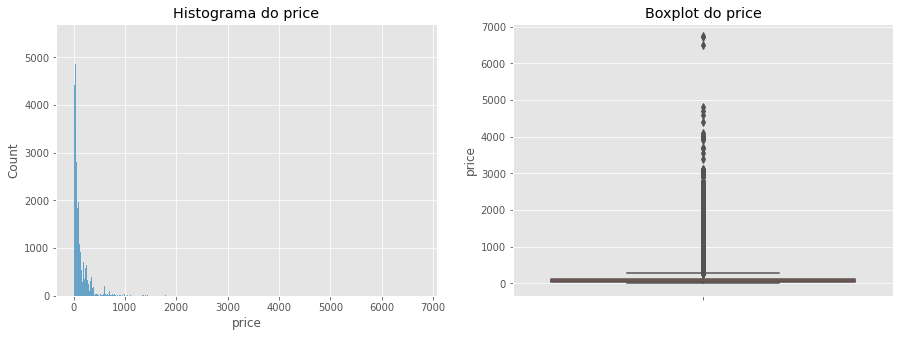

In [34]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(15,5))

sns.histplot(data=df_olist_items['price'], ax=axes[0])
axes[0].set_title('Histograma do price')

sns.boxplot(y=df_olist_items['price'], ax=axes[1])
axes[1].set_title('Boxplot do price')
plt.show()

Estatísticas descritivas para o atributo freight_value

* O valor do frete por item vaira entre 0 (frete gratis) e 409, 68 reais.

* A maioria das taxas de frete estão concentradas entre 13,08 e 21,15 reais.

* Tambéms é possível observar que a variável possui outliers.

In [35]:
df_olist_items['freight_value'].describe()

count    112650.000000
mean         19.990320
std          15.806405
min           0.000000
25%          13.080000
50%          16.260000
75%          21.150000
max         409.680000
Name: freight_value, dtype: float64

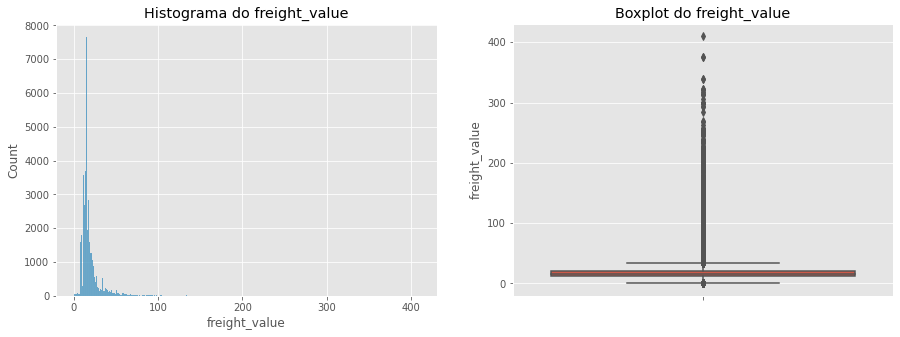

In [36]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(15,5))

sns.histplot(data=df_olist_items['freight_value'], ax=axes[0])
axes[0].set_title('Histograma do freight_value')

sns.boxplot(y=df_olist_items['freight_value'], ax=axes[1])
axes[1].set_title('Boxplot do freight_value')
plt.show()

### Processamento dos Dados

* Nessa etapa, será aplicado junções de tabelas, filtros e criação de novas variáveis.

#### Juntando Datasets

Juntando df_olist_custmers a df_olist_orders

In [37]:
df_customers_orders = df_olist_customers.merge(right=df_olist_orders, how='inner', on='customer_id')

In [38]:
df_customers_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


Juntando df_customers_orders a df_olist_items

In [39]:
df_customers_orders_items = df_customers_orders.merge(right=df_olist_items, how='inner', on='order_id')

In [40]:
df_customers_orders_items.shape

(112650, 18)

In [41]:
df_customers_orders_items.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

#### Filtrando colunas e observações

Filtrando colunas

* Serão utilizadas as colunas customer_unique_id,	order_id,	order_status,	price e	freight_value

In [42]:
df_customers_orders_items = df_customers_orders_items[['customer_unique_id', 'order_id', 'order_status', 'price', 'freight_value']]

In [43]:
df_customers_orders_items.head()

,customer_unique_id,order_id,order_status,price,freight_value
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,delivered,124.99,21.88
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,delivered,289.00,46.48
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,139.94,17.79
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,delivered,149.94,23.36
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,230.00,22.25


Filtrando registros com base no status do pedido

* Serão desconsiderados pedidos com status unavailable e canceled.

In [44]:
df_customers_orders_items = df_customers_orders_items[(df_customers_orders_items['order_status'] != 'unavailable') & (df_customers_orders_items['order_status'] != 'canceled')]

### Construindo novas variáveis

#### Valor total gasto por cliente

Agrupando por customer_unique_id

In [45]:
df_values_by_customers = df_customers_orders_items.groupby(by='customer_unique_id').sum()

Criando coluna de valor total gasto por cliente

* O gasto total por cliente é o price do pedido.

* O Apesar do frete ser um custo para o cliente, não vamos considera-lo com um valor gasto na plataforma, já que isso não se converte em receita para o lojista.

In [46]:
df_values_by_customers['total_value'] = df_values_by_customers['price']

In [47]:
df_values_by_customers.reset_index(level=0, inplace=True)

#### Total de pedidos por cliente

* Serão desconsiderados pedidos com status canceled, unavailable e created.

Filtrando order_status

In [48]:
df_customers_orders = df_customers_orders[(df_customers_orders['order_status'] != 'canceled') & (df_customers_orders['order_status'] != 'unavailable') & (df_customers_orders['order_status'] != 'created')]

Agrupando por customer_unique_id

In [49]:
df_customers_orders = df_customers_orders.groupby('customer_unique_id').count()['order_id']

Criando novo Dataframe e ajustando o índice

In [50]:
df_customers_orders = pd.DataFrame(df_customers_orders)
df_customers_orders.reset_index(level=0, inplace=True)

In [51]:
df_customers_orders.shape

(94986, 2)

Juntando tabelas com iformações de gasto por cliente e pedido por cliente

In [52]:
df_total_values_orders = df_values_by_customers.merge(right=df_customers_orders, how='inner', on='customer_unique_id')

In [53]:
df_total_values_orders.head()

,customer_unique_id,price,freight_value,total_value,order_id
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90,12.00,129.90,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,8.29,18.90,1
2,0000f46a3911fa3c0805444483337064,69.00,17.22,69.00,1
3,0000f6ccb0745a6a4b88665a16c9f078,25.99,17.63,25.99,1
4,0004aac84e0df4da2b147fca70cf8255,180.00,16.89,180.00,1


Excluindo e renomeando colunas de df_total_values_orders

In [54]:
df_customers_info = df_total_values_orders[['customer_unique_id', 'total_value', 'order_id']]

In [55]:
df_customers_info.rename(columns={'order_id':'total_orders'}, inplace=True)

In [56]:
df_customers_info

,customer_unique_id,total_value,total_orders
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,1
2,0000f46a3911fa3c0805444483337064,69.00,1
3,0000f6ccb0745a6a4b88665a16c9f078,25.99,1
4,0004aac84e0df4da2b147fca70cf8255,180.00,1
...,...,...,...
94978,fffcf5a5ff07b0908bd4e2dbc735a684,1570.00,1
94979,fffea47cd6d3cc0a88bd621562a9d061,64.89,1
94980,ffff371b4d645b6ecea244b27531430a,89.90,1
94981,ffff5962728ec6157033ef9805bacc48,115.00,1


### Modelando o Cluster

Criando um Dataframe apenas com as variáveis utilizadas na modelagem

In [57]:
features = df_customers_info[['total_value', 'total_orders']]

Padronizando os dados

In [58]:
standart_scaler = StandardScaler()
features_scaled = standart_scaler.fit_transform(features)

Buscando o número ótimo de clusters

In [59]:
wss = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(features_scaled)
  wss.append(kmeans.inertia_)

Plotando inércias em função do núme de clusters

* Segundo o Método Elbow Curve, o número ideal de cluster é aquele que combina o menor Within Sum of Squares e o menor número de clusters simultanemente.

* Então, iremos utilizar 4 clusters

Text(0, 0.5, 'WCSS')

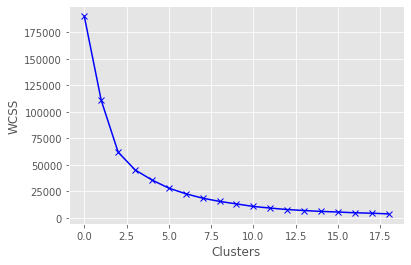

In [60]:
plt.plot(wss, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS')

Criando o modelo

In [61]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(features_scaled)

KMeans(n_clusters=4)

Criando coluna para identificar o cluster de cada observação.

In [62]:
df_customers_info['cluster'] = kmeans.labels_
df_customers_info.head()

,customer_unique_id,total_value,total_orders,cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90,1,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,1,0
2,0000f46a3911fa3c0805444483337064,69.00,1,0
3,0000f6ccb0745a6a4b88665a16c9f078,25.99,1,0
4,0004aac84e0df4da2b147fca70cf8255,180.00,1,0


Plotando a clusterização

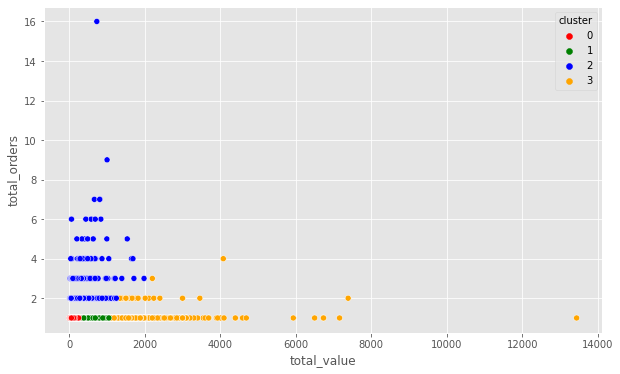

In [63]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_customers_info, x='total_value', y='total_orders', hue='cluster', palette=['red', 'green', 'blue', 'orange'])
plt.show()

### Análise Geral dos Clusters

Carregando tabelas para análise de cluster

In [64]:
df_olist_order_items = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projetos/Olist E-commerce/Dados/olist_order_items_dataset.csv')
df_olist_products = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projetos/Olist E-commerce/Dados/olist_products_dataset.csv')
df_olist_reviews = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projetos/Olist E-commerce/Dados/olist_order_reviews_dataset.csv')
df_olist_geolocation = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projetos/Olist E-commerce/Dados/olist_geolocation_dataset.csv')

Juntando tabelas

In [65]:
customers= df_customers_info.merge(right=df_olist_customers, how='inner', on='customer_unique_id')
customers_orders = customers.merge(right=df_olist_orders, how='inner', on='customer_id')
customers_orders_items = customers_orders.merge(right=df_olist_order_items, how='inner', on='order_id')
customers_products = customers_orders_items.merge(right=df_olist_products, how='inner', on='product_id')
customers_reviews = customers_orders.merge(df_olist_reviews, how='inner', on='order_id')

Total de gastos dos clientes por clusters

* O cluster 0 gerou o maior faturamento total

In [66]:
print(customers_products[customers_products['cluster'] == 3]['total_value'].sum())
print(customers_products[customers_products['cluster'] == 2]['total_value'].sum())
print(customers_products[customers_products['cluster'] == 1]['total_value'].sum())
print(customers_products[customers_products['cluster'] == 0]['total_value'].sum())

2353779.64
2033542.27
5097665.25
8855412.920000002


Média dos gastos dos clientes por cluster

* Mesmo o cluster 0 sendo o que gerou maior faturamento total,  obteve o menor faturamento médio.

* O cluster 2 gerou o maior faturamento médio.

In [67]:
print(customers_products[customers_products['cluster'] == 3]['total_value'].mean())
print(customers_products[customers_products['cluster'] == 2]['total_value'].mean())
print(customers_products[customers_products['cluster'] == 1]['total_value'].mean())
print(customers_products[customers_products['cluster'] == 0]['total_value'].mean())

1841.7681064162755
278.376765229295
479.9609500047076
95.29224375598577


Estatísticas descritivas do valor total gasto por cluster

In [68]:
print('Cluster 3')
print(customers_products[customers_products['cluster'] == 3]['total_value'].describe())
print('___________________________')

print('Cluster 2')
print(customers_products[customers_products['cluster'] == 2]['total_value'].describe())
print('___________________________')

print('Cluster 1')
print(customers_products[customers_products['cluster'] == 1]['total_value'].describe())
print('___________________________')


print('Cluster 0')
print(customers_products[customers_products['cluster'] == 0]['total_value'].describe())

Cluster 3
count     1278.000000
mean      1841.768106
std       1242.295807
min       1089.000000
25%       1295.250000
50%       1519.730000
75%       1977.000000
max      13440.000000
Name: total_value, dtype: float64
___________________________
Cluster 2
count    7305.000000
mean      278.376765
std       245.089757
min        11.980000
25%       119.800000
50%       199.800000
75%       347.500000
max      1980.280000
Name: total_value, dtype: float64
___________________________
Cluster 1
count    10621.000000
mean       479.960950
std        190.402708
min        284.000000
25%        330.000000
50%        399.900000
75%        587.700000
max       1086.760000
Name: total_value, dtype: float64
___________________________
Cluster 0
count    92929.000000
mean        95.292244
std         63.394357
min          0.850000
25%         45.000000
50%         79.900000
75%        132.900000
max        283.200000
Name: total_value, dtype: float64


Distribuição de frequência dos gastos de cada cluster

* O cluster 0, apesar de conter a maior quantidade de clientes, em geral executam compras de baixo valor. O valores estão concentrados entre 45 e 132 reais.

* O cluster 1 tem o terceiro maior número de clientes. Os valores dos pedios estão concentrados entre 12 e 347 reais.

* O cluster 2 tem o menor número de clientes, mas em conpensação, os integrantes desse grupo fazem pedidos com os valores mais elevados entre todos. Os valores estão concentrados entre 1.085 e 1.977 reais.

* Por último, o cluster 3 tem o maior equilíbrio. Possui o segundo maior gasto total e o segundo maior gasto médio. Esse grupo possui o segundo maior número de clientes, mas diferentemente do cluster 0, esses clientes tem um patamar maior de gasto dentro da plataforma. Os valores concentram-se entre 281 e 585 reais.




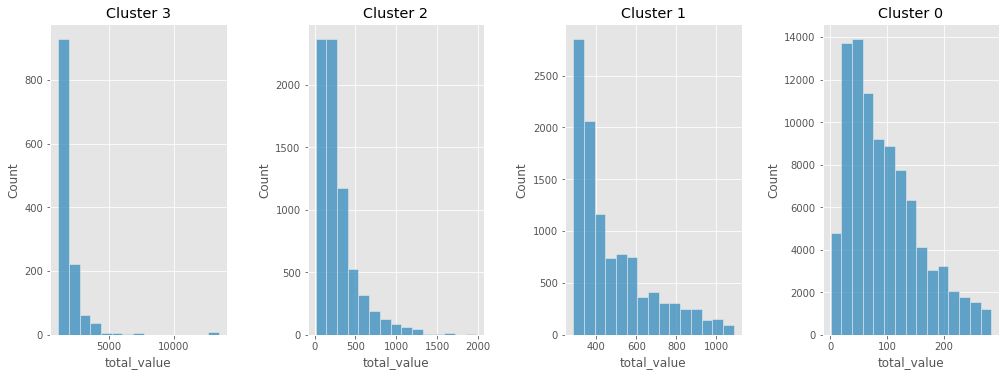

In [69]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15,6))
fig.tight_layout(pad=5.0)


sns.histplot(x=customers_products[customers_products['cluster'] == 3]['total_value'], bins= 15 ,ax=axes[0])
axes[0].set_title('Cluster 3')

sns.histplot(x=customers_products[customers_products['cluster'] == 2]['total_value'], bins= 15, ax=axes[1])
axes[1].set_title('Cluster 2')

sns.histplot(x=customers_products[customers_products['cluster'] == 1]['total_value'], bins= 15, ax=axes[2])
axes[2].set_title('Cluster 1')

sns.histplot(x=customers_products[customers_products['cluster'] == 0]['total_value'], bins= 15, ax=axes[3])
axes[3].set_title('Cluster 0')
plt.show()

### Análise individual dos clusters

#### Análise do cluster 2: clientes que proporcionaram o maior faturamento médio

Faturamento total dos cliente do cluster 2

In [70]:
customers_2 = customers_products[customers_products['cluster'] == 2]
customers_2['total_value'].sum()

2033542.27

Estatísticas descritivas

* Para esse grupo, o valor mínimo gasto por um cliente no marketeplace foi 1.084,9 reais, enquanto o valor máximo foi de 13.440 reais.

* O máximo de pedidos executados pelo grupo foi de 4, mas a grande maioria  fez apenas 1 pedido.

* Os clientes desse grupo, em sua maioria, costumam comprar produtos com preços entre 379 e 1.183 reais.



Vizualizando estatísticas do price

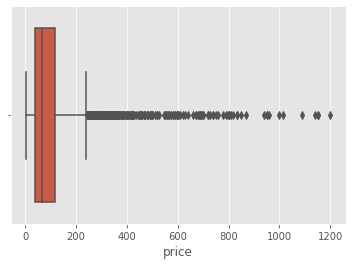

In [71]:
sns.boxplot(customers_2['price'])
plt.show()

In [72]:
customers_2[['total_value', 'total_orders', 'price']].describe()

,total_value,total_orders,price
count,7305.000000,7305.000000,7305.000000
mean,278.376765,2.242710,95.063363
std,245.089757,0.943842,99.752545
min,11.980000,2.000000,2.900000
25%,119.800000,2.000000,36.900000
50%,199.800000,2.000000,67.800000
75%,347.500000,2.000000,119.000000
max,1980.280000,16.000000,1199.900000


Quais estados tem maior número de pedidos com relação a clientes do cluster 2?

* Os estados com mais pedidos para os clientes do cluster 2 são São Paulo, Rio de Janeiro e Minas Gerais.

In [73]:
customers_2['customer_state'].value_counts()

SP    3202
RJ    1028
MG     831
RS     406
PR     368
SC     258
BA     226
DF     146
ES     141
GO     138
PE      99
MT      71
CE      51
PA      50
MS      43
MA      43
RO      30
PB      30
PI      25
SE      25
RN      25
AL      23
TO      16
AM      13
AC      10
AP       4
RR       3
Name: customer_state, dtype: int64

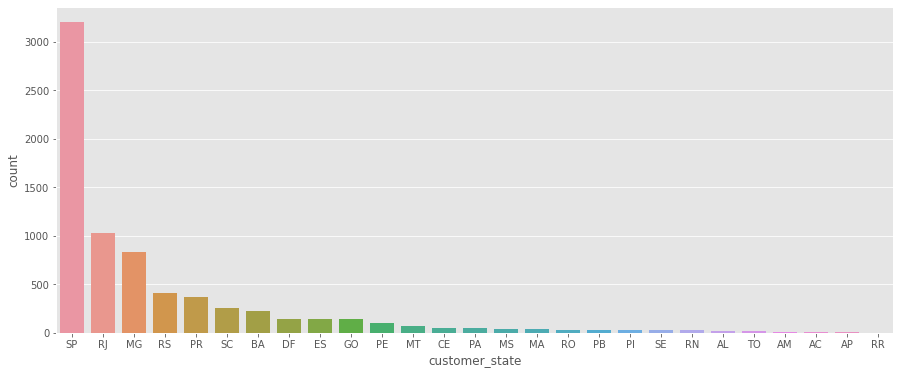

In [74]:
plt.figure(figsize=(15,6))
sns.countplot(customers_2['customer_state'], order=customers_2['customer_state'].value_counts().index)
plt.show()

Quais categorias de produtos são mais compradas por clientes do cluster 2?

* As categorias de produto mais compradas são artigos de informática, PCs, beleza e Saúde, e artigos automotivos.

* Dessa forma, essas categorias poderiam ser recomendadas para clientes desse grupo. 

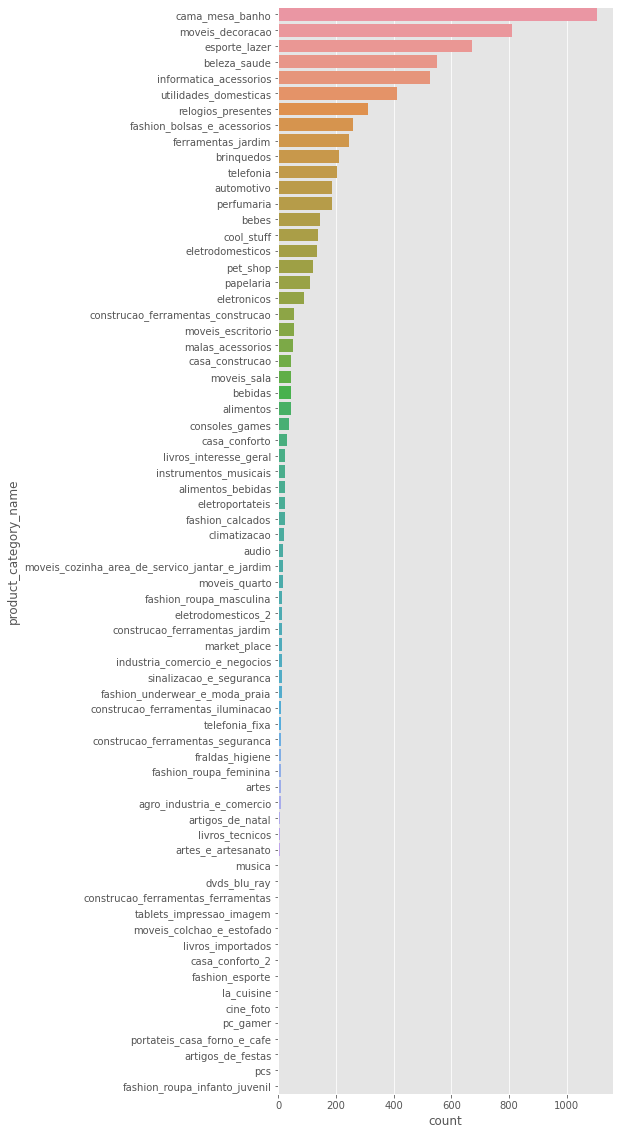

In [75]:
plt.figure(figsize=(6,20))
sns.countplot(data=customers_2, y='product_category_name', order=customers_2['product_category_name'].value_counts().index)
plt.show()

Qual o comportamento dos reviews do cluster 2?

Score médio de review

In [76]:
customers_reviews[customers_reviews['cluster'] == 2]['review_score'].mean()

4.166434648105182

Frequência de reviews

* A maioria dos reviews tem nota 5

* 142 reviews tem nota 1, demostrando que alguns clientes desse grupo não gostaram muito da experiência no marketplace.

In [77]:
customers_reviews[customers_reviews['cluster'] == 2]['review_score'].value_counts()

5    3962
4    1128
1     663
3     527
2     185
Name: review_score, dtype: int64

#### Análise do cluster 0: grupo com maior número de pedidos e maior faturamento total

In [78]:
customers_0 = customers_products[customers_products['cluster'] == 0]

Estatísticas decritivas

* Todos os clientes desse grupo executaram apenas um pedido.

In [79]:
customers_0.describe()

,total_value,total_orders,cluster,customer_zip_code_prefix,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,92929.000000,92929.0,92929.0,92929.000000,92929.000000,92929.000000,92929.000000,91532.000000,91532.000000,91532.000000,92915.000000,92915.000000,92915.000000,92915.000000
mean,95.292244,1.0,0.0,34786.848874,1.141753,82.323797,18.360565,48.753190,757.778078,2.206387,1727.723597,29.387225,15.741990,22.450013
std,63.394357,0.0,0.0,29786.607254,0.524307,58.259378,11.440843,10.079482,621.075581,1.726216,2980.020329,15.546289,12.473371,11.192004
min,0.850000,1.0,0.0,1003.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,7.000000
25%,45.000000,1.0,0.0,11060.000000,1.000000,37.900000,12.800000,42.000000,341.000000,1.000000,250.000000,18.000000,8.000000,15.000000
50%,79.900000,1.0,0.0,24220.000000,1.000000,65.990000,15.930000,52.000000,589.000000,1.000000,600.000000,24.000000,12.000000,20.000000
75%,132.900000,1.0,0.0,58030.000000,1.000000,114.900000,19.660000,57.000000,947.000000,3.000000,1600.000000,36.000000,20.000000,30.000000
max,283.200000,1.0,0.0,99990.000000,21.000000,283.200000,244.340000,76.000000,3988.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Quais estados tem maior número de pedidos com relação a clientes do cluster 0?

* Os estados com mais pedidos para os clientes do cluster  são São Paulo, Rio de Janeiro e Minas Gerais.

In [80]:
customers_0['customer_state'].value_counts()

SP    39602
RJ    11993
MG    10993
RS     5107
PR     4689
SC     3458
BA     3072
DF     1985
ES     1902
GO     1869
PE     1458
CE     1154
PA      840
MT      803
MS      678
MA      645
PB      447
PI      426
RN      423
AL      337
SE      297
TO      253
RO      203
AM      133
AP       66
AC       59
RR       37
Name: customer_state, dtype: int64

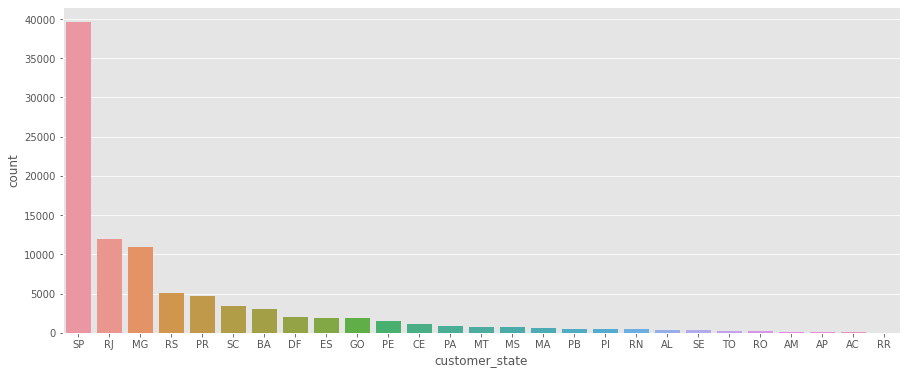

In [81]:
plt.figure(figsize=(15,6))
sns.countplot(customers_0['customer_state'], order=customers_0['customer_state'].value_counts().index)
plt.show()

Quais categorias de produtos são mais compradas por clientes do cluster 0?

* As categorias de produto mais compradas são artigos de cama, mesa e banho, beleza e saúde, esporte e lazer e móveis e decuração.

* Artigos de informática, por serem mais caros, é apen as a quinta categoria com mais pedidos.

* PCs, que para o cluster 2 ficou em primeiro, para esse grupo ficou em último.

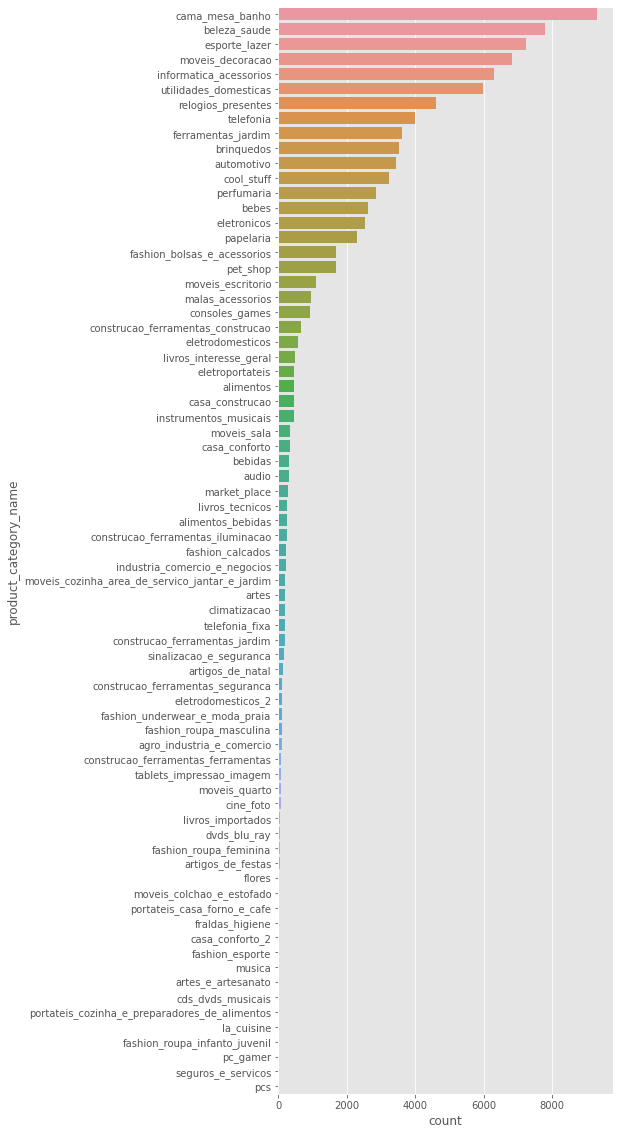

In [82]:
plt.figure(figsize=(6,20))
sns.countplot(data=customers_0, y='product_category_name', order=customers_0['product_category_name'].value_counts().index)
plt.show()

Qual o comportamento dos reviews do cluster 0?

Review score médio

* O score médio dos reviews é 4,1. Média maior que o cluster 2.

In [83]:
customers_reviews[customers_reviews['cluster'] == 0]['review_score'].mean()

4.124712373655234

Frequência dos reviews

* A maior parte dos clientes deu nota 5

* Review com nota 1 teve a terceira maior frequência

In [84]:
customers_reviews[customers_reviews['cluster'] == 0]['review_score'].value_counts()

5    48436
4    16387
1     8650
3     6934
2     2600
Name: review_score, dtype: int64